# Loading data

# Data prep

In [ ]:
import pandas as pd
import numpy as np

# Loading data

# column names
columns = ["engine_id", "cycle", "Op_Cond_1", "Op_Cond_2", "Op_Cond_3"] + \
               [f"Sensor_{i}" for i in range(1, 22)]

# change the path to the location where data has been saved
# Load training and test datasets
train_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/train_FD001.txt", delim_whitespace=True, header=None, names=columns, engine='python')
test_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/test_FD001.txt", delim_whitespace=True, header=None, names=columns, engine='python')
rul_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/RUL_FD001.txt", delim_whitespace=True, header=None, names=["RUL"])

# Data prep
# Get the max cycle for each engine
max_cycles = train_df.groupby("engine_id")["cycle"].max().reset_index()

# Rename the 'cycle' column to 'Max_cycle' in max_cycles to avoid conflicts during merge
max_cycles.rename(columns={"cycle": "Max_cycle"}, inplace=True)

# Merge to calculate RUL
train_df = train_df.merge(max_cycles, on="engine_id", how="left")

# Compute RUL
train_df["RUL"] = train_df["Max_cycle"] - train_df["cycle"]

# Drop the temporary 'Max_cycle' column
train_df.drop(columns=["Max_cycle"], inplace=True)

# Add actual RUL labels to the test set
test_df = test_df.merge(rul_df, left_on='engine_id', right_index=True, how='left')

# Check the number of samples before creating lag features
print("Number of samples in train_df before creating lag features:", len(train_df))
print("Number of samples in test_df before creating lag features:", len(test_df))

/var/folders/10/b65wyt311j9gp4zw9cj08b5w0000gn/T/ipykernel_97653/1775318246.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/train_FD001.txt", delim_whitespace=True, header=None, names=columns, engine='python')


Number of samples in train_df before creating lag features: 20631
Number of samples in test_df before creating lag features: 13096


/var/folders/10/b65wyt311j9gp4zw9cj08b5w0000gn/T/ipykernel_97653/1775318246.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/test_FD001.txt", delim_whitespace=True, header=None, names=columns, engine='python')
/var/folders/10/b65wyt311j9gp4zw9cj08b5w0000gn/T/ipykernel_97653/1775318246.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/RUL_FD001.txt", delim_whitespace=True, header=None, names=["RUL"])


In [95]:
test_last

,engine_id,cycle,Op_Cond_1,Op_Cond_2,Op_Cond_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606,137
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953,82
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608,59
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,117


In [102]:
# Create lag features
def create_lag_features(df, target, lags):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df.groupby('engine_id')[target].shift(lag)
    return df

# Create lag features for training and testing data
lags = 3
train_df = create_lag_features(train_df, "RUL", lags)
test_df = create_lag_features(test_df, "RUL", lags)

# Drop rows with NaN values created by shifting
train_df = train_df.dropna()
test_df = test_df.dropna()

# Check the number of samples after creating lag features
print("Number of samples in train_df after creating lag features:", len(train_df))
print("Number of samples in test_df after creating lag features:", len(test_df))

Number of samples in train_df after creating lag features: 20331
Number of samples in test_df after creating lag features: 12601


In [103]:
# Define the feature set
X_train = train_df.drop(columns=["RUL", 'engine_id', 'cycle'])
y_train = train_df["RUL"]
X_test = test_df.drop(columns=["RUL", 'engine_id', 'cycle'])
y_test = test_df["RUL"]

# Check the shape of X_train and X_test before reshaping
print("Shape of X_train before reshaping:", X_train.shape)
print("Shape of X_test before reshaping:", X_test.shape)

# Reshape the data for LSTM
num_features = X_train.shape[1] // lags
X_train = X_train.values.reshape((X_train.shape[0], lags, num_features))
X_test = X_test.values.reshape((X_test.shape[0], lags, num_features))
y_train = y_train.values
y_test = y_test.values

# Check the shape of X_train and X_test after reshaping
print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_test after reshaping:", X_test.shape)

Shape of X_train before reshaping: (20331, 27)
Shape of X_test before reshaping: (12601, 27)
Shape of X_train after reshaping: (20331, 3, 9)
Shape of X_test after reshaping: (12601, 3, 9)


In [104]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


636/636 - 1s - 2ms/step - loss: 6996.2412 - val_loss: 1386.2412
Epoch 2/50
636/636 - 1s - 984us/step - loss: 2634.8115 - val_loss: 530.3483
Epoch 3/50
636/636 - 1s - 1ms/step - loss: 111.2515 - val_loss: 6.7576
Epoch 4/50
636/636 - 1s - 1ms/step - loss: 3.5916 - val_loss: 9.5527
Epoch 5/50
636/636 - 1s - 1ms/step - loss: 3.3453 - val_loss: 3.2652
Epoch 6/50
636/636 - 1s - 984us/step - loss: 3.4218 - val_loss: 0.5959
Epoch 7/50
636/636 - 1s - 1ms/step - loss: 3.7382 - val_loss: 0.6556
Epoch 8/50
636/636 - 1s - 997us/step - loss: 4.0702 - val_loss: 4.8789
Epoch 9/50
636/636 - 1s - 993us/step - loss: 6.2526 - val_loss: 9.6231
Epoch 10/50
636/636 - 1s - 985us/step - loss: 8.0135 - val_loss: 22.6431
Epoch 11/50
636/636 - 1s - 977us/step - loss: 10.2022 - val_loss: 11.0616
Epoch 12/50
636/636 - 1s - 981us/step - loss: 10.4798 - val_loss: 6.0444
Epoch 13/50
636/636 - 1s - 998us/step - loss: 10.2428 - val_loss: 5.8963
Epoch 14/50
636/636 - 1s - 1ms/step - loss: 9.8490 - val_loss: 8.2728
Epoch 

# Evaluation

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
Test MAE: 1.9155495068202197
RMSE: 1.9368065690927003
R²: 0.9978490139854062


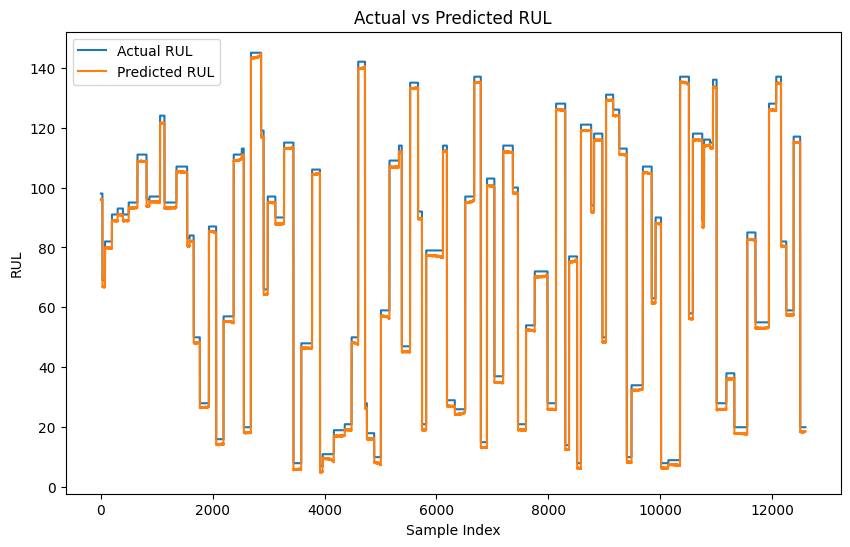

In [106]:
import matplotlib.pyplot as plt

# Plot the predicted RUL vs actual RUL
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL')
plt.legend()
plt.show()

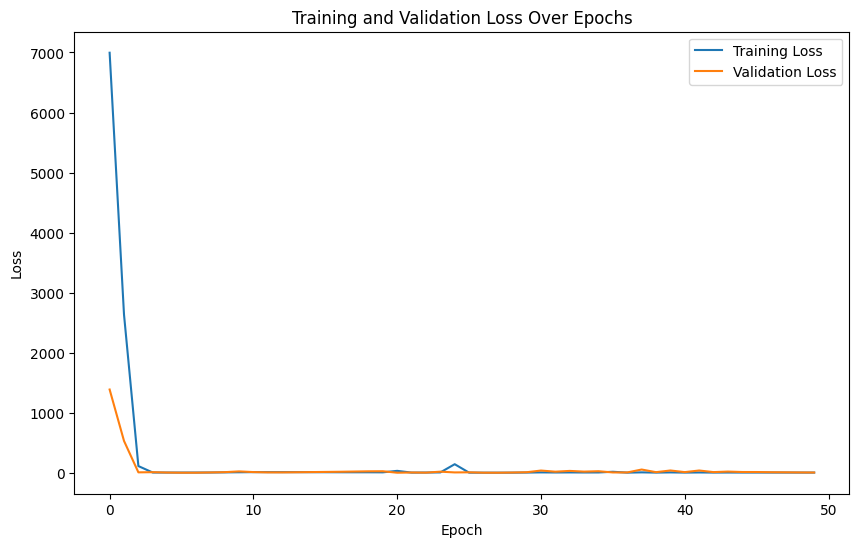

In [108]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [107]:
from keras.models import load_model

# Save the model
model.save('lstm_rul_model.h5')

# Load the model (if needed)
# model = load_model('lstm_rul_model.h5')

# Further evaluation

In [109]:

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
cv_mae = []
cv_rmse = []
cv_r2 = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Build the LSTM model
    model_cv = Sequential()
    model_cv.add(LSTM(50, activation='relu', input_shape=(X_train_cv.shape[1], X_train_cv.shape[2])))
    model_cv.add(Dense(1))
    model_cv.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model_cv.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0, shuffle=False)
    
    # Make predictions
    y_val_pred = model_cv.predict(X_val_cv)
    
    # Calculate evaluation metrics
    val_mae = mean_absolute_error(y_val_cv, y_val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
    val_r2 = r2_score(y_val_cv, y_val_pred)
    
    # Store results
    cv_mae.append(val_mae)
    cv_rmse.append(val_rmse)
    cv_r2.append(val_r2)

# Print cross-validation results
print(f"Cross-Validation MAE: {np.mean(cv_mae)} (+/- {np.std(cv_mae)})")
print(f"Cross-Validation RMSE: {np.mean(cv_rmse)} (+/- {np.std(cv_rmse)})")
print(f"Cross-Validation R²: {np.mean(cv_r2)} (+/- {np.std(cv_r2)})")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
Cross-Validation MAE: 0.9299980938434601 (+/- 0.5307586117202121)
Cross-Validation RMSE: 1.0213907758313536 (+/- 0.5894423992692356)
Cross-Validation R²: 0.9996933341026306 (+/- 0.0002696696995336747)


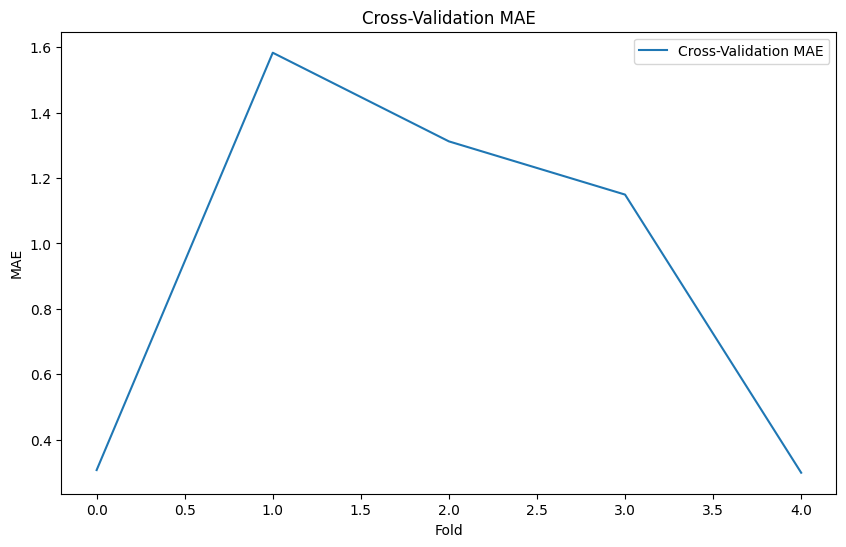

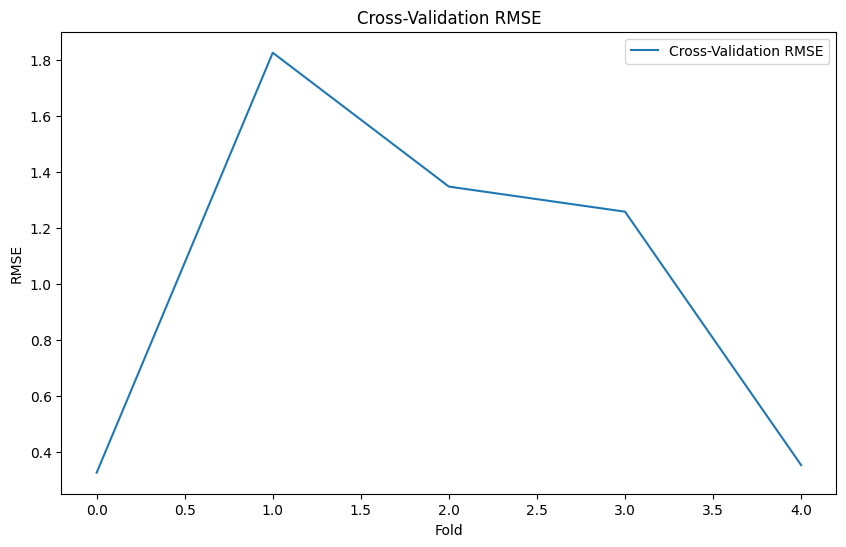

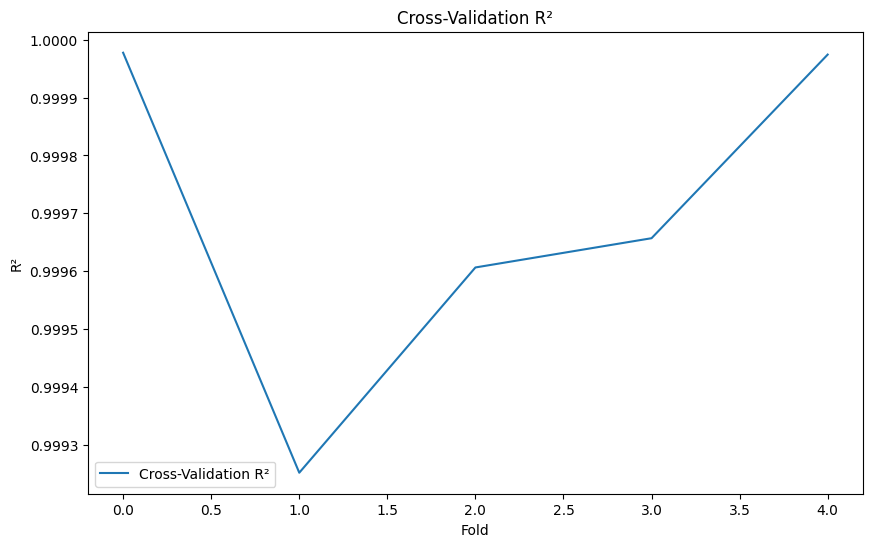

In [110]:
import matplotlib.pyplot as plt

# Plot Cross-Validation MAE
plt.figure(figsize=(10, 6))
plt.plot(cv_mae, label='Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('Cross-Validation MAE')
plt.legend()
plt.show()

# Plot Cross-Validation RMSE
plt.figure(figsize=(10, 6))
plt.plot(cv_rmse, label='Cross-Validation RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE')
plt.legend()
plt.show()

# Plot Cross-Validation R²
plt.figure(figsize=(10, 6))
plt.plot(cv_r2, label='Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.title('Cross-Validation R²')
plt.legend()
plt.show()

In [111]:
# Load the additional test dataset
additional_test_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/test_FD002.txt", delim_whitespace=True, header=None, names=columns, engine='python')
additional_rul_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/RUL_FD002.txt", delim_whitespace=True, header=None, names=["RUL"])

# Add actual RUL labels to the additional test set
additional_test_df = additional_test_df.merge(additional_rul_df, left_on='engine_id', right_index=True, how='left')

/var/folders/10/b65wyt311j9gp4zw9cj08b5w0000gn/T/ipykernel_97653/2722100066.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  additional_test_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/test_FD002.txt", delim_whitespace=True, header=None, names=columns, engine='python')
/var/folders/10/b65wyt311j9gp4zw9cj08b5w0000gn/T/ipykernel_97653/2722100066.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  additional_rul_df = pd.read_csv("/Users/bradynholt/Desktop/personal projects/CMAPSSData/RUL_FD002.txt", delim_whitespace=True, header=None, names=["RUL"])


In [112]:
# Create lag features for the additional test data
additional_test_df = create_lag_features(additional_test_df, "RUL", lags)

# Drop rows with NaN values created by shifting
additional_test_df = additional_test_df.dropna()

# Define the feature set
X_additional_test = additional_test_df.drop(columns=["RUL", 'engine_id', 'cycle'])
y_additional_test = additional_test_df["RUL"]

# Reshape the data for LSTM
X_additional_test = X_additional_test.values.reshape((X_additional_test.shape[0], lags, num_features))
y_additional_test = y_additional_test.values

# Check the shape of X_additional_test
print("Shape of X_additional_test:", X_additional_test.shape)

Shape of X_additional_test: (33094, 3, 9)


In [113]:
# Load the trained model
model = load_model('lstm_rul_model.h5')

# Make predictions on the additional test set
y_additional_pred = model.predict(X_additional_test)

# Calculate evaluation metrics
additional_test_mae = mean_absolute_error(y_additional_test, y_additional_pred)
additional_test_rmse = np.sqrt(mean_squared_error(y_additional_test, y_additional_pred))
additional_test_r2 = r2_score(y_additional_test, y_additional_pred)

print(f"Additional Test MAE: {additional_test_mae}")
print(f"Additional Test RMSE: {additional_test_rmse}")
print(f"Additional Test R²: {additional_test_r2}")

1035/1035 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
Additional Test MAE: 15.311994430924742
Additional Test RMSE: 18.654416893119006
Additional Test R²: 0.8803397680019673


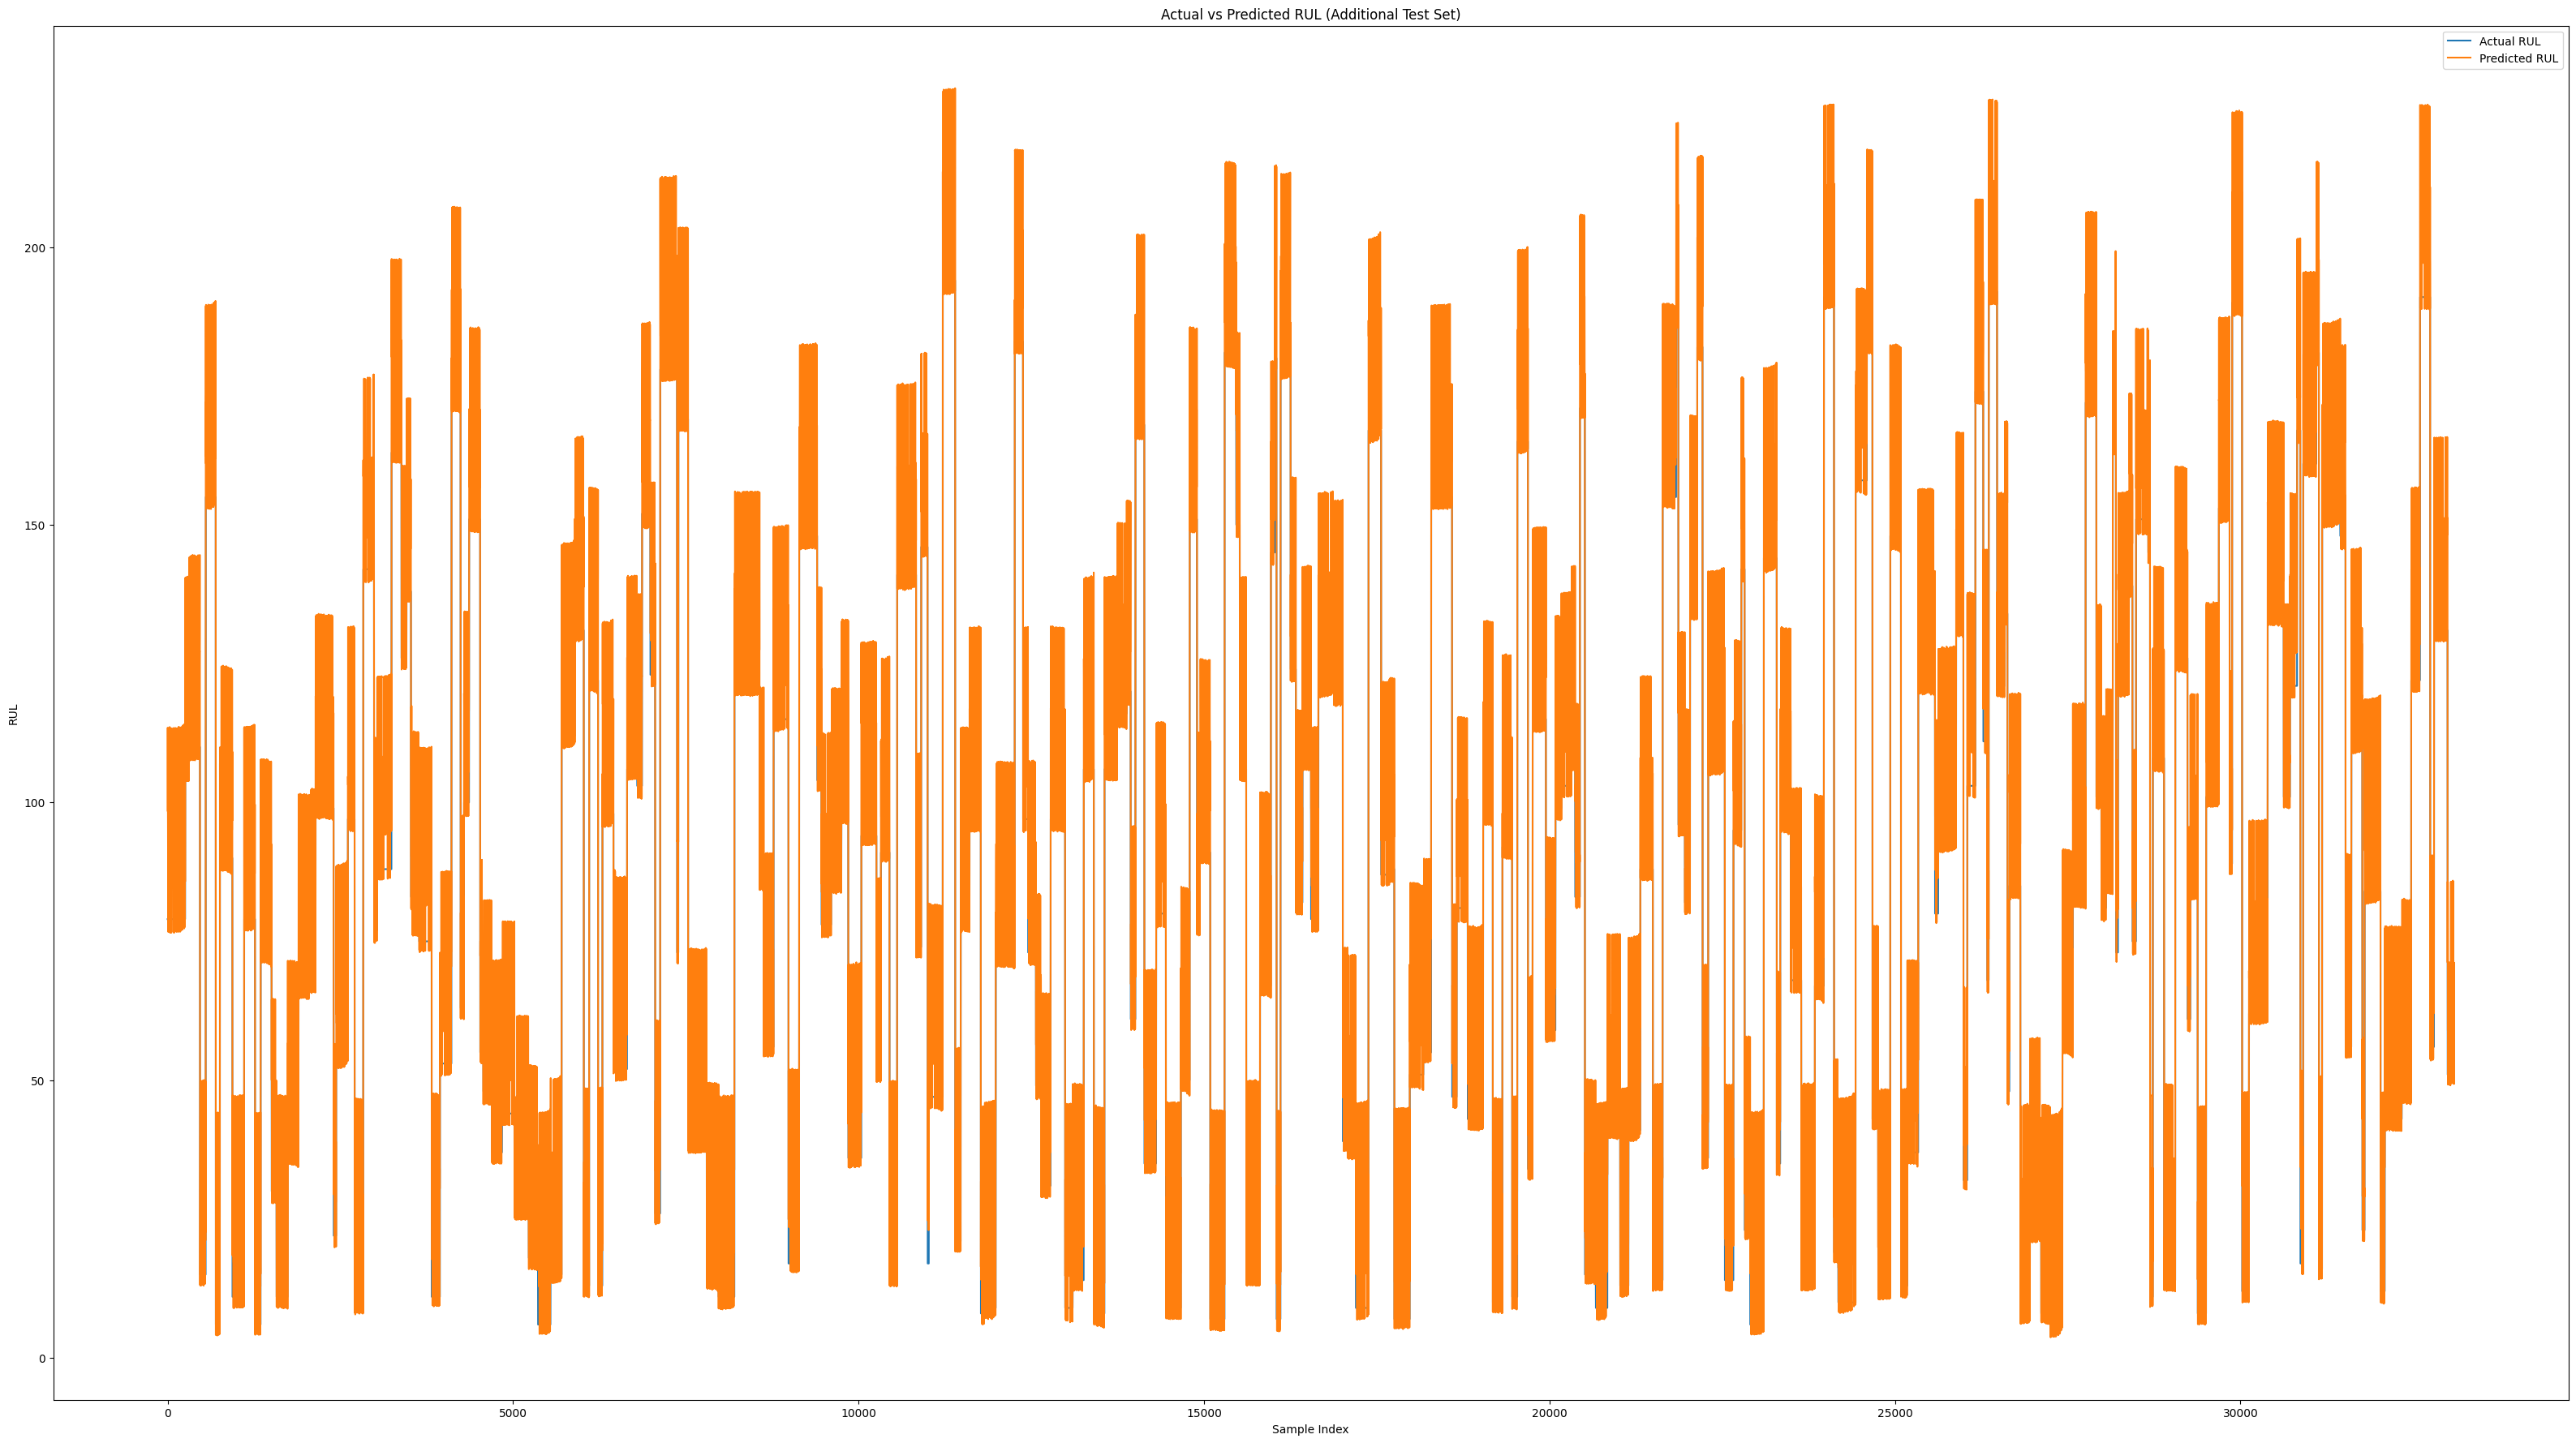

In [117]:
# Plot the predicted RUL vs actual RUL for the additional test set
plt.figure(figsize=(40, 22))
plt.plot(y_additional_test, label='Actual RUL')
plt.plot(y_additional_pred, label='Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL (Additional Test Set)')
plt.legend()
plt.show()